In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df= df.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'})

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


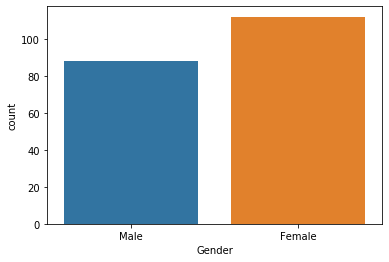

In [6]:
sns.countplot('Gender',data=df)

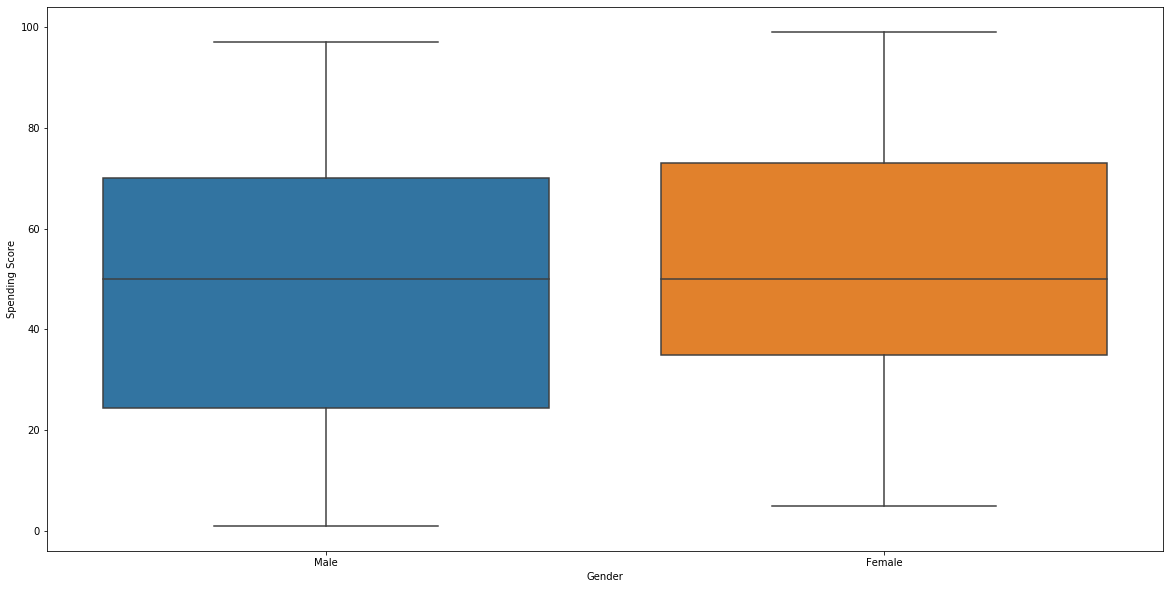

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Gender',y='Spending Score',data=df)

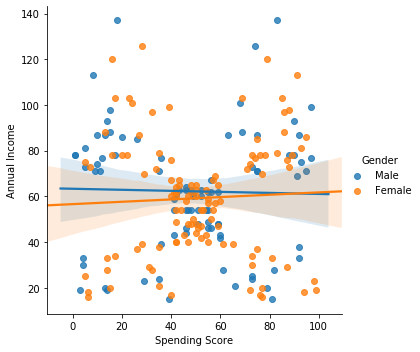

In [10]:
sns.lmplot(x='Spending Score',y='Annual Income',hue='Gender',data=df)

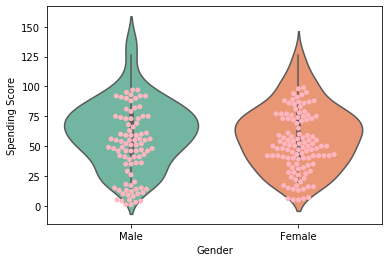

In [25]:
sns.violinplot(x='Gender',y='Annual Income',data=df,palette="Set2")
sns.swarmplot(x='Gender',y='Spending Score',data=df,color='lightpink')

This plot gives the perfect idea that women spend more as compared to men and also that men earn more 

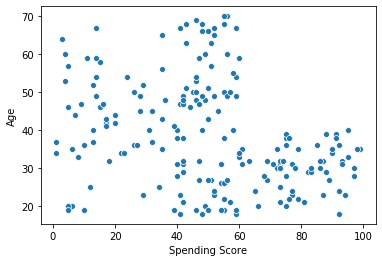

In [18]:
sns.scatterplot(x='Spending Score',y='Age',data=df)


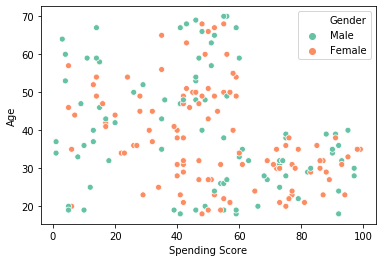

In [22]:
sns.scatterplot(x='Spending Score',y='Age',data=df,hue='Gender',palette="Set2")


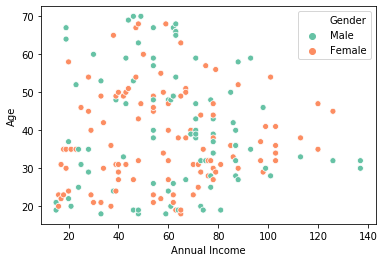

In [23]:
sns.scatterplot(x='Annual Income',y='Age',data=df,hue='Gender',palette="Set2")


In [29]:
x = df['Annual Income']
y = df['Age']
z = df['Spending Score']

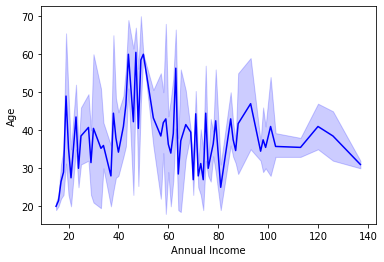

In [30]:
sns.lineplot(x, y, color = 'blue')

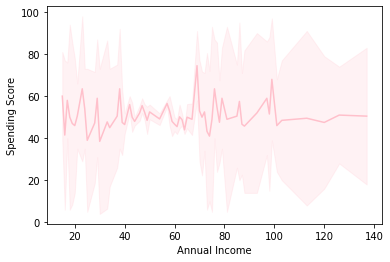

In [31]:
sns.lineplot(x, z, color = 'pink')


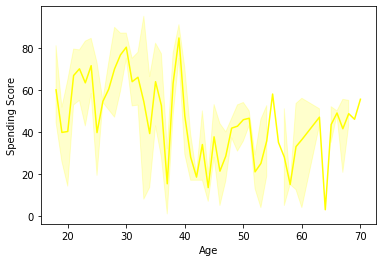

In [32]:
sns.lineplot(y, z, color = 'yellow')


In [43]:
x=df.iloc[:,[3,4]].values
x.shape

(200, 2)

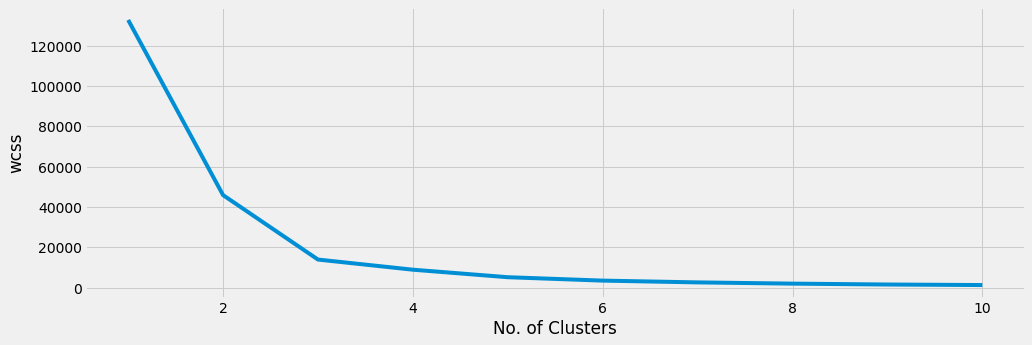

In [91]:
from sklearn.cluster import KMeans

arr=[]
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    arr.append(km.inertia_)
    
plt.plot(range(1, 11), arr)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

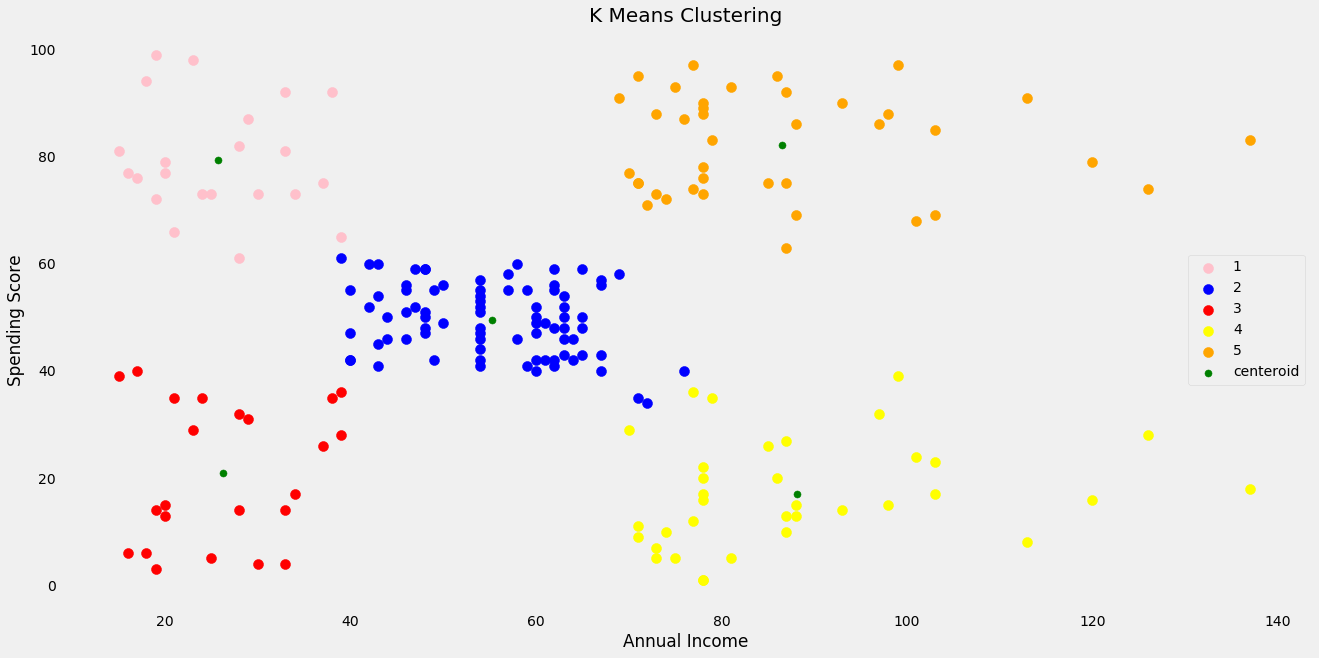

In [51]:
km = KMeans(n_clusters=5)
y_means=km.fit_predict(x)
plt.figure(figsize=(20,10))
plt.scatter(x[y_means==0,0],x[y_means==0,1] ,s = 100, c = 'pink', label = '1')
plt.scatter(x[y_means==1,0],x[y_means==1,1] ,s = 100, c = 'blue', label = '2')
plt.scatter(x[y_means==2,0],x[y_means==2,1] ,s = 100, c = 'red', label = '3')
plt.scatter(x[y_means==3,0],x[y_means==3,1] ,s = 100, c = 'yellow', label = '4')
plt.scatter(x[y_means==4,0],x[y_means==4,1] ,s = 100, c = 'orange', label = '5')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'green' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

using age and gender 

In [69]:
z=df.iloc[:,[2,4]].values
z.shape

(200, 2)

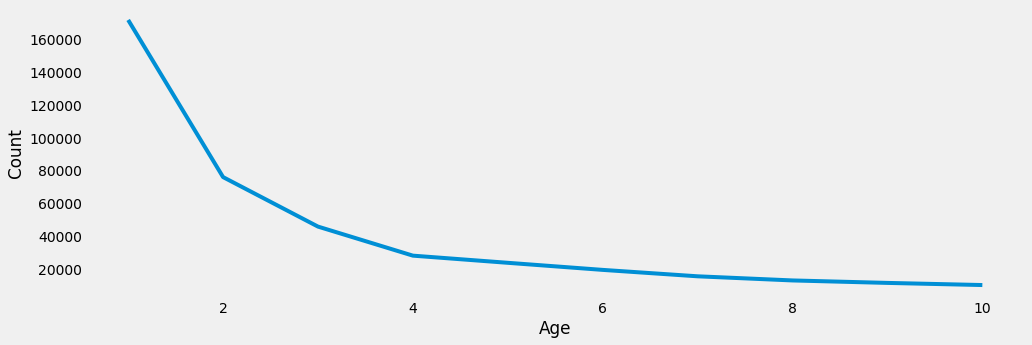

In [90]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(z)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

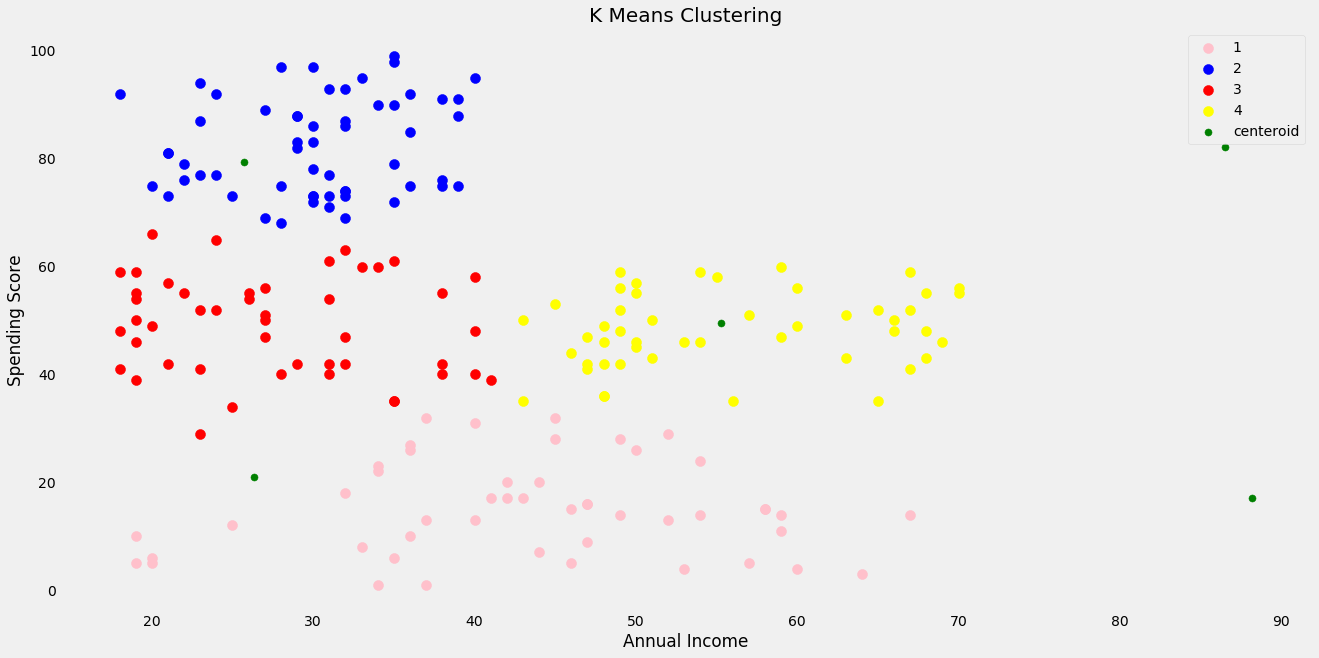

In [73]:
km2 = KMeans(n_clusters=4)
y_means2 = km2.fit_predict(z)

plt.figure(figsize=(20,10))
plt.scatter(z[y_means2==0,0],z[y_means2==0,1] ,s = 100, c = 'pink', label = '1')
plt.scatter(z[y_means2==1,0],z[y_means2==1,1] ,s = 100, c = 'blue', label = '2')
plt.scatter(z[y_means2==2,0],z[y_means2==2,1] ,s = 100, c = 'red', label = '3')
plt.scatter(z[y_means2==3,0],z[y_means2==3,1] ,s = 100, c = 'yellow', label = '4')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'green' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()